In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
data = pd.read_excel(r"C:\Users\gog10\GfK Spectacle\GfK-Spectacle\GfK_spectacle_lenses_data.xlsx")

In [3]:
data.head()

,item_id,main_text,country_name,retailer_pg,mdm_brand_text,mdm_model_text
0,138176095,ID1.60LIFESTL3IURBAN(RX),SPAIN,CRISTALES,HOYA,HOYALUX ID LIFESTYLE 3-I HVLL
1,138176095,ID1.60LIFESTL3IURBAN(RX),SPAIN,CRISTALES,HOYA,HOYALUX ID LIFESTYLE 3-I HVLL
2,138176095,ID1.60LIFESTL3IURBAN(RX),SPAIN,CRISTALES,HOYA,HOYALUX ID LIFESTYLE 3-I HVLL
3,138176095,ID1.60LIFESTL3IURBAN(RX),SPAIN,CRISTALES,HOYA,HOYALUX ID LIFESTYLE 3-I HVLL
4,138176095,ID1.60LIFESTL3IURBAN(RX),SPAIN,CRISTALES,HOYA,HOYALUX ID LIFESTYLE 3-I HVLL


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549 entries, 0 to 3548
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   item_id         3549 non-null   int64 
 1   main_text       3547 non-null   object
 2   country_name    3549 non-null   object
 3   retailer_pg     3549 non-null   object
 4   mdm_brand_text  3549 non-null   object
 5   mdm_model_text  3549 non-null   object
dtypes: int64(1), object(5)
memory usage: 166.5+ KB


In [5]:
#Replace null values in the data
data.loc[data['main_text'].isnull(), 'main_text'] = 'Not Known'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549 entries, 0 to 3548
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   item_id         3549 non-null   int64 
 1   main_text       3549 non-null   object
 2   country_name    3549 non-null   object
 3   retailer_pg     3549 non-null   object
 4   mdm_brand_text  3549 non-null   object
 5   mdm_model_text  3549 non-null   object
dtypes: int64(1), object(5)
memory usage: 166.5+ KB


In [6]:
#Get number of values per column to see if the data can be categorised
data.nunique()

item_id            260
main_text         2815
country_name         2
retailer_pg         44
mdm_brand_text      23
mdm_model_text     253
dtype: int64

In [7]:
#Counts by item id
item_id_count = data['item_id'].value_counts()
item_id_count

82981040     290
138176095    226
87099837     116
88210952      71
79429232      51
            ... 
81343196       5
122769301      5
124336576      5
119795873      5
64840970       5
Name: item_id, Length: 260, dtype: int64

In [8]:
#Counts by country
country_count = data['country_name'].value_counts()
country_count

SPAIN      2270
GERMANY    1279
Name: country_name, dtype: int64

C:\Users\gog10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


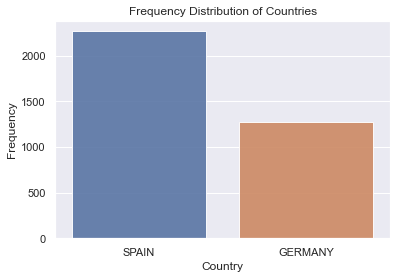

In [9]:
#Plot counts by country
sns.set(style="darkgrid")
sns.barplot(country_count.index, country_count.values, alpha=0.9)
plt.title('Frequency Distribution of Countries')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()  

In [10]:
import itertools
import nltk
nltk.download()
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

texts = np.array(data['main_text']) #text contents in dataframe to array for processing
texts


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


array(['ID1.60LIFESTL3IURBAN(RX)', 'ID1.60LIFESTL3IURBAN(RX)',
       'ID1.60LIFESTL3IURBAN(RX)', ...,
       'CRISTALES 34317 NULUX ACTIVE TF 1.5 HV ORGÁNICO HI VISION',
       'CRISTALES 34244 MI LIFESTYLE 3I 1.5 HVLL BC PROGRESIVO ORGÁNICO HVLL BC',
       'CRISTALES 34244 MI LIFESTYLE 3I 1.5 BC PROGRESIVO ORGÁNICO HVLL BC'],
      dtype=object)

In [11]:
vocab_length = len(nltk.word_tokenize(list(itertools.chain.from_iterable(texts))))

TypeError: expected string or bytes-like object

In [ ]:


vectorizer = TfidfVectorizer()
vec_transform = v.fit_transform(data['main_text'])
vectorizer.get_feature_names()

In [ ]:
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

texts = data['main_text']


def textExtraction(data):
    vectorizer = CountVectorizer(analyzer = texts, min_df = 0.1)
    data[texts] = data[texts].replace(np.nan, '', regex=True)
    vectorizer.fit_transform(data[texts])
    vocab = vectorizer.get_feature_names()
    
    return vocab

data['Vocab'] = data.apply(textExtraction, axis=1)


vocab_length = len(nltk.word_tokenize(list(itertools.chain.from_iterable(texts)))


In [ ]:
data

In [ ]:
import itertool
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
                  
#make Tfidf Vectorizer      
vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = vocab_length)


#text contents in dataframe to array for processing
texts = data['main_text']
texts = np.array(data['main_text']) 

#concatenate all the texts and tokenize the whole corpus
vocab_length = len(nltk.word_tokenize(list(itertools.chain.from_iterable(texts)))
                

#encode the text
tfidf_encodings = vectorizer.fit_transform(texts) 

#vectorized texts to dense list format for storage in dataframe
data['tfidf'] = list(tfidf_encodings.toarray()) 

#get the vectors back out of the dataframe for use in something else
vectors_for_training = np.array(df['tfidf'].tolist()) 
X_train, y_train, X_test, y_test = train_test_split(vectors_for_training, data['category'].tolist())

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(df.tfidf.tolist())
                   

In [ ]:
#Counts per category for brand text (post prediction)
data['mdm_brand_text'].value_counts()

In [ ]:
#Extract first word from model text (post prediction) to make model text more meaningful
data['make'] = data['mdm_model_text'].str.split(' ').str[0]
data

In [ ]:
#Check value counts of this new column
data['make'].value_counts().head(27)

In [ ]:
data['main_text'] = data['main_text'].astype(str)

In [ ]:
#Use categories from brand (20 or above) and model (30 0r above) text to pull out meaningful data from main text column (pre prediction). Create new "brand_model" column.
data.loc[data['main_text'].str.contains('ESSILOR'), 'brand_model'] = 'ESSILOR' 
data.loc[data['main_text'].str.contains('HOYA'), 'brand_model'] = 'HOYA'
data.loc[data['main_text'].str.contains('ZEISS'), 'brand_model'] = 'ZEISS'
data.loc[data['main_text'].str.contains('INDO'), 'brand_model'] = 'INDO'
data.loc[data['main_text'].str.contains('RODENSTOCK'), 'brand_model'] = 'RODENSTOCK'
data.loc[data['main_text'].str.contains('SYNCHRONY'), 'brand_model'] = 'SYNCHRONY'
data.loc[data['main_text'].str.contains('RUPP & HUBRACH'), 'brand_model'] = 'RUPP & HUBRACH'
data.loc[data['main_text'].str.contains('MAILSHOP'), 'brand_model'] = 'MAILSHOP'
data.loc[data['main_text'].str.contains('PRATS'), 'brand_model'] = 'PRATS' 
data.loc[data['main_text'].str.contains('SHAMIR'), 'brand_model'] = 'SHAMIR' 
data.loc[data['main_text'].str.contains('MEDICAL VISION '), 'brand_model'] = 'MEDICAL VISION ' 
data.loc[data['main_text'].str.contains('NIKA'), 'brand_model'] = 'NIKA'  


data.loc[data['main_text'].str.contains('VARILUX'), 'brand_model'] = 'VARILUX' 
data.loc[data['main_text'].str.contains('ORMIX'), 'brand_model'] = 'ORMIX' 
data.loc[data['main_text'].str.contains('PROGRESSIVE'), 'brand_model'] = 'PROGRESSIVE' 
data.loc[data['main_text'].str.contains('HOYALUX'), 'brand_model'] = 'HOYALUX' 
data.loc[data['main_text'].str.contains('MONOFOCAL'), 'brand_model'] = 'MONOFOCAL' 
data.loc[data['main_text'].str.contains('HILUX'), 'brand_model'] = 'HILUX' 
data.loc[data['main_text'].str.contains('INDOSOL'), 'brand_model'] = 'INDOSOL' 
data.loc[data['main_text'].str.contains('EYEZEN'), 'brand_model'] = 'EYEZEN' 
data.loc[data['main_text'].str.contains('IMPRESSION'), 'brand_model'] = 'IMPRESSION' 
data.loc[data['main_text'].str.contains('ORG'), 'brand_model'] = 'ORG' 
data.loc[data['main_text'].str.contains('HELLAPLAST'), 'brand_model'] = 'HELLAPLAST' 
data.loc[data['main_text'].str.contains('SMILE'), 'brand_model'] = 'SMILE' 
data.loc[data['main_text'].str.contains('MAXXEE'), 'brand_model'] = 'MAXXEE' 
data.loc[data['main_text'].str.contains('IDEAL'), 'brand_model'] = 'IDEAL' 
data.loc[data['main_text'].str.contains('ACTIVA'), 'brand_model'] = 'ACTIVA' 
data.loc[data['main_text'].str.contains('NULUX'), 'brand_model'] = 'NULUX'
data.loc[data['main_text'].str.contains('BALANSIS'), 'brand_model'] = 'BALANSIS' 
data.loc[data['main_text'].str.contains('AIRWEAR'), 'brand_model'] = 'AIRWEAR' 
data.loc[data['main_text'].str.contains('NEW'), 'brand_model'] = 'NEW' 
data.loc[data['main_text'].str.contains('L4F'), 'brand_model'] = 'L4F' 
data.loc[data['main_text'].str.contains('MULTIGRESSIV'), 'brand_model'] = 'MULTIGRESSIV'
data.loc[data['main_text'].str.contains('PROGRESSIV '), 'brand_model'] = 'PROGRESSIV ' 
data.loc[data['main_text'].str.contains('ORMA'), 'brand_model'] = 'ORMA' 
data.loc[data['main_text'].str.contains('OR'), 'brand_model'] = 'OR'
data.loc[data['main_text'].str.contains('UNIFOCAL'), 'brand_model'] = 'UNIFOCAL'
data

In [ ]:
data['brand_model'].count()

In [ ]:
data.dtypes

In [ ]:
###### Check value counts of retailer product group (pre prediction) column
data['retailer_pg'].value_counts().head(20)

In [ ]:
#Extract common words from retailer_pg column to group categories together and make data more meaningful
data.loc[data['retailer_pg'].str.contains('GL'), 'product_group'] = 'GLA' 
data.loc[data['retailer_pg'].str.contains('CRISTALES'), 'product_group'] = 'CRISTALES' 
data.loc[data['retailer_pg'].str.contains('OFTALMICAS'), 'product_group'] = 'OFTALMICAS'
data.loc[data['retailer_pg'].str.contains('PROGRESIV'), 'product_group'] = 'PROGRESIVA' 
data.loc[data['retailer_pg'].str.contains('MONOFOCAL'), 'product_group'] = 'MONOFOCAL'
data.loc[data['retailer_pg'].str.contains('VIDRES'), 'product_group'] = 'VIDRES' 
data.loc[data['retailer_pg'].str.contains('BIFOCAL'), 'product_group'] = 'BIFOCAL' 
data


In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [ ]:
#Remove all rows with at least one null value
data.dropna(inplace=True)
data.isnull().sum()

In [ ]:
#Denote country name into numerical categories
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
categorical_col = ['country_name']
for col in categorical_col:
    data[col] = l.fit_transform(data[col])
data.head()

In [ ]:
#Split dataframe into countries
data_germany = data[data['country_name'] == 0]
data_spain = data[data['country_name'] == 1]
data_spain.info()

In [ ]:
#Check item_id counts for Spain only
item_id_count = data_spain['item_id'].value_counts()
item_id_count

In [ ]:
data_germany.info()

In [ ]:
#Check brand model counts within Germany
data_germany['brand_model'].value_counts()

In [ ]:
#Check product group counts within Germany - Only 1
data_germany['product_group'].value_counts()

In [ ]:
data_spain.info()

In [ ]:
#Remove all rows with at least one null value
data_spain.dropna(inplace=True)
data_spain.isnull().sum()

In [ ]:
data_spain.info()

In [ ]:
#Check brand model counts within Spain
data_spain['brand_model'].value_counts()

In [ ]:
#Check product group counts within Spain - more meaningful
data_spain['product_group'].value_counts()

In [ ]:
#Plot product group counts within Spain
product_group_count = data_spain['product_group'].value_counts()

product_group_freq = sns.set(style="darkgrid", font_scale = 0.7)
sns.barplot(product_group_count.index, product_group_count.values, alpha=0.9)
plt.title('Frequency Distribution of Product Groups')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('product_group', fontsize=12)
plt.show()  

In [ ]:
#Create numerical values for model
categorical_col = ['item_id']
for col in categorical_col:
    data_spain[col] = l.fit_transform(data_spain[col])

In [ ]:
#Create numerical values for model
categorical_col = ['brand_model']
for col in categorical_col:
    data_spain[col] = l.fit_transform(data_spain[col])


In [3344]:
#Create numerical values for model
categorical_col = ['product_group']
for col in categorical_col:
    data_spain[col] = l.fit_transform(data_spain[col])
data_spain.head()

C:\Users\gog10\AppData\Local\Temp/ipykernel_23504/2210986162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spain[col] = l.fit_transform(data_spain[col])


,item_id,main_text,country_name,retailer_pg,mdm_brand_text,mdm_model_text,make,brand_model,product_group
5,52,ESS ILIKIA XTRA FIT ORMIX 16,1,CRISTALES,ESSILOR,VARILUX ILIKIA XTRA ORMIX FORTE UV,VARILUX,12,1
6,52,ESS ILIKIA XTRA FIT ORMIX 16,1,CRISTALES,ESSILOR,VARILUX ILIKIA XTRA ORMIX FORTE UV,VARILUX,12,1
7,103,BALANSIS 1.60 (RX),1,CRISTALES,HOYA,BALANSIS 1.6 HV,BALANSIS,2,1
8,103,BALANSIS 1.60 (RX),1,CRISTALES,HOYA,BALANSIS 1.6 HV,BALANSIS,2,1
9,96,CRISTALES ID1.60LIFESTL3URBAN(RX)/PROGRESIVOS/...,1,LENTES OFTALMICAS,HOYA,HOYALUX ID LIFESTYLE 3-I HVLL,HOYALUX,12,3


In [3345]:
#Delete columns not needed for model
data_spain.drop(['main_text', 'country_name', 'retailer_pg', 'mdm_brand_text', 'mdm_model_text', 'make'], axis = 'columns', inplace=True)
data_spain

C:\Users\gog10\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,item_id,brand_model,product_group
5,52,12,1
6,52,12,1
7,103,2,1
8,103,2,1
9,96,12,3
...,...,...,...
3544,7,12,1
3545,71,12,1
3546,68,12,1
3547,96,12,1


In [3346]:
#Define X and y values for model
X = data_spain.drop('item_id', axis =1)
y = data_spain['item_id']

In [3347]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [3348]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3349]:
# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='ovr')

In [3350]:
# Train model
model = clf.fit(X_std, y)

In [3351]:
# Fitting the model with training data
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [3352]:
# Making a prediction on the test set
prediction = model.predict(X_test)

In [3353]:
precision = precision_score(y_test, prediction, average='micro', zero_division=0)
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test, prediction, average='micro', zero_division=0)
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(y_test, prediction, average='micro', zero_division=0)
print('f1 score: {0:0.2f}'.format(recall))

Precision score: 0.25
Recall score: 0.25
f1 score: 0.25


In [3354]:
#Create numerical values for model
categorical_col = ['brand_model']
for col in categorical_col:
    data_germany[col] = l.fit_transform(data_germany[col])

C:\Users\gog10\AppData\Local\Temp/ipykernel_23504/635402056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_germany[col] = l.fit_transform(data_germany[col])


In [3355]:
data_germany.drop(['main_text', 'country_name', 'retailer_pg', 'mdm_brand_text', 'mdm_model_text', 'make', 'product_group'], axis = 'columns', inplace=True)
data_germany

C:\Users\gog10\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,item_id,brand_model
412,110711856,6
444,104139800,2
446,82319609,7
461,91685284,6
482,64840970,4
...,...,...
3277,90120905,5
3278,82319245,7
3281,82319609,7
3300,2296911,0


In [3356]:
X = data_germany.drop('item_id', axis =1)
y = data_germany['item_id']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [3357]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='ovr')

# Train model
model = clf.fit(X_std, y)

# Fitting the model with training data
model.fit(X_train, y_train)

# Making a prediction on the test set
prediction = model.predict(X_test)

In [3358]:
precision = precision_score(y_test, prediction, average='micro', zero_division=0)
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test, prediction, average='micro', zero_division=0)
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(y_test, prediction, average='micro', zero_division=0)
print('f1 score: {0:0.2f}'.format(recall))

Precision score: 0.16
Recall score: 0.16
f1 score: 0.16


In [3359]:
#Create numerical values for model
categorical_col = ['brand_model']
for col in categorical_col:
    data[col] = l.fit_transform(data[col])

categorical_col = ['product_group']
for col in categorical_col:
    data[col] = l.fit_transform(data[col])
data.head()

,item_id,main_text,country_name,retailer_pg,mdm_brand_text,mdm_model_text,make,brand_model,product_group
5,101261697,ESS ILIKIA XTRA FIT ORMIX 16,1,CRISTALES,ESSILOR,VARILUX ILIKIA XTRA ORMIX FORTE UV,VARILUX,16,1
6,101261697,ESS ILIKIA XTRA FIT ORMIX 16,1,CRISTALES,ESSILOR,VARILUX ILIKIA XTRA ORMIX FORTE UV,VARILUX,16,1
7,140544215,BALANSIS 1.60 (RX),1,CRISTALES,HOYA,BALANSIS 1.6 HV,BALANSIS,2,1
8,140544215,BALANSIS 1.60 (RX),1,CRISTALES,HOYA,BALANSIS 1.6 HV,BALANSIS,2,1
9,138176095,CRISTALES ID1.60LIFESTL3URBAN(RX)/PROGRESIVOS/...,1,LENTES OFTALMICAS,HOYA,HOYALUX ID LIFESTYLE 3-I HVLL,HOYALUX,16,4


In [3360]:
data.drop(['country_name','main_text', 'retailer_pg', 'mdm_brand_text', 'mdm_model_text', 'make'], axis = 'columns', inplace=True)
data

,item_id,brand_model,product_group
5,101261697,16,1
6,101261697,16,1
7,140544215,2,1
8,140544215,2,1
9,138176095,16,4
...,...,...,...
3544,25278162,16,1
3545,115519055,16,1
3546,112904161,16,1
3547,138176095,16,1


In [3361]:
X = data.drop('item_id', axis =1)
y = data['item_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3362]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='ovr')

# Train model
model = clf.fit(X_std, y)

# Fitting the model with training data
model.fit(X_train, y_train)

# Making a prediction on the test set
prediction = model.predict(X_test)

In [3363]:
precision = precision_score(y_test, prediction, average='micro', zero_division=0)
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test, prediction, average='micro', zero_division=0)
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(y_test, prediction, average='micro', zero_division=0)
print('f1 score: {0:0.2f}'.format(recall))

Precision score: 0.24
Recall score: 0.24
f1 score: 0.24


In [3364]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
sns.set()


In [3365]:
data_spain_bayes = data_spain[['item_id', 'product_group', 'brand_model']]

In [3366]:
encoder = OrdinalEncoder()
features = data_spain_bayes.columns.tolist()
data_encoded = encoder.fit_transform(data_spain_bayes[features])
data_spain_bayes_encoded = pd.DataFrame(data_encoded, columns=features)
data_encoded


array([[ 52.,   1.,  12.],
       [ 52.,   1.,  12.],
       [103.,   1.,   2.],
       ...,
       [ 68.,   1.,  12.],
       [ 96.,   1.,  12.],
       [ 96.,   1.,  12.]])

In [3367]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(data_spain_bayes['item_id'])
data_spain_bayes_encoded['item_id'] = target_encoded
encoder.inverse_transform(target_encoded)


array([ 52,  52, 103, ...,  68,  96,  96], dtype=int64)

In [3368]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data_spain_bayes_encoded.values, i) for i in range(len(features))]
vif["features"] = features
vif


,VIF,features
0,3.525979,item_id
1,3.330794,product_group
2,4.976472,brand_model


In [3369]:
X_train, X_test, y_train, y_test = train_test_split(data_spain_bayes_encoded.drop('item_id', axis=1), data_spain_bayes_encoded['item_id'], test_size=0.3, random_state=143)

In [3370]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)


CategoricalNB()

In [3371]:
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)
count_misclassified = (y_test != y_pred_cnb).sum()


In [3372]:
print("CategoricalNB")
print("=" * 30)
print('Misclassified samples ; {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))

CategoricalNB
Misclassified samples ; 256
Accuracy: 0.32


In [3373]:
print("Recall score : ", recall_score(y_test, y_pred_cnb, average='micro'))
print("Precision score : ", precision_score(y_test, y_pred_cnb, average = 'micro'))
print("F1 score : ", f1_score(y_test, y_pred_cnb, average='micro'))

Recall score :  0.3155080213903743
Precision score :  0.3155080213903743
F1 score :  0.3155080213903743


In [3374]:
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         4
          21       0.00    

C:\Users\gog10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gog10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gog10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3375]:
#Further thoughts:
#Could we add 'Country' into the model?
#